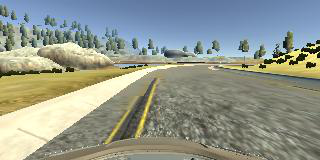

In [7]:
from PIL import Image

img = Image.open('/Volumes/CPSC587DATA/RecordedImg/OFF_LEFT/center_2017_10_10_16_30_47_570.jpg')
img

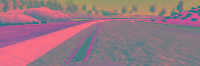

In [8]:
from img_utils import process_image

img_processed = process_image(img)
Image.fromarray(img_processed)

In [11]:
import tensorflow as tf
from keras import backend as K, Input
from keras.engine import Model
from keras.layers import Conv2D, Flatten

from img_utils import IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
K.set_session(sess)

In [21]:
img_input = Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))
img_conv = Conv2D(32, (8, 8), strides=(4, 4), padding='same', activation='relu')(img_input)
img_conv = Conv2D(64, (4, 4), strides=(2, 2), padding='same', activation='relu')(img_conv)
img_conv = Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu')(img_conv)
img_conv = Flatten()(img_conv)

img_m = Model(inputs=img_input, outputs=img_conv)
img_m.input_shape, img_m.output_shape

((None, 66, 200, 3), (None, 14400))

In [64]:
img_conved = m.predict(img_processed.reshape(1, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))
Image.fromarray(img_conved[0])

ValueError: The model expects 2  arrays, but only received one array. Found: array with shape (1, 66, 200, 3)

In [37]:
from keras.layers import BatchNormalization, Dense
import numpy as npinfo_input = Input(shape=(3,))

info_conv = Dense(3, activation='relu')(info_input)
info_m = Model(inputs=info_input, outputs=info_conv)
info_m.predict(np.array([[.9, -.8, 28],
                         [.8, .8, 0]]))

array([[ 14.76769924,  10.63964272,   5.363585  ],
       [  0.        ,   0.        ,   0.        ]], dtype=float32)

In [55]:
from keras.layers import concatenate
from keras.optimizers import Adam

combin = concatenate([img_conv, info_input], axis=-1)
combin = Dense(512, activation='relu')(combin)
outputs = Dense(3)(combin)

m = Model(inputs=[img_input, info_input], outputs=outputs)

adam = Adam(lr=1e-4)

m.input_shape, m.output_shape
m.compile(loss='mse', optimizer=adam)

In [62]:
result = m.predict([img_processed.reshape(1, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS),
           np.array([[.1, .2, 30]])])
result

array([[-11.48823357, -10.7171154 ,  -8.61190891]], dtype=float32)

In [63]:
np.argmax(result)

2

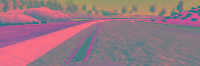

In [66]:
Image.fromarray(img_processed.reshape(1, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)[0])